In [1]:
import sys
import re
sys.path.insert(0, r'..\..\frxas.py')

import glob
import numpy as np

from numpy import fft

import matplotlib.pyplot as plt

from frxas import time_domain, models, hdf5_io
%reload_ext autoreload
%autoreload 2

In [2]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV'
amp = ''
harmonics = 4
fit_kws={'ftol':1e-13, 'xtol':1e-13}


for i in range(1, 22):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)

    ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=301)

    Ns = ti.size
    freq_in = time_domain.get_freq(direc, point, amp, file)
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    if Ns%2 == 1:
        Ns = Ns - 1
        ti = ti[:-1]
        V = V[:-1]
        J = J[:-1]
        Ir = Ir[:-1]

    freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
    frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))
    
    J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\0.25 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\0.25 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\0.25 Hz 150 mV {str(point[1:])}_V', V_adj_fit)

A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P1\R2
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P2\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P3\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P4\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P5\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P6\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P7\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P8\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P9\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P10\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P11\R2
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P12\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\0.25 Hz 150 mV\P13\R2
A:\BrianGerwe\Research\Data\fr-XAS

In [3]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV'

for i in range(1, 20):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)

    ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=301)

    Ns = ti.size
    freq_in = time_domain.get_freq(direc, point, amp, file)
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    if Ns%2 == 1:
        Ns = Ns - 1
        ti = ti[:-1]
        V = V[:-1]
        J = J[:-1]
        Ir = Ir[:-1]

    freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
    frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))
    
    J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\1 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\1 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\1 Hz 150 mV {str(point[1:])}_V', V_adj_fit)

A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P1\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P2\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P3\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P4\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P5\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P6\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P7\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P8\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P9\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P10\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P11\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P12\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P13\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\1 Hz 150 mV\P14\R1
A

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV'

for i in range(1, 22):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)

    ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
    
    cyc_int = int(ti[-1]/freq_in)
    cyc_frac = ti[-1]/freq_in - cyc_int
    if not np.isclose(cyc_frac, ti[1]/freq_in):
        Ns_adj = int(cyc_int*freq_in/ti[1])
        ti = ti[:Ns_adj]
        V = V[:Ns_adj]
        J = J[:Ns_adj]
        Ir = Ir[:Ns_adj]
    Ns = ti.size
    freq_in = time_domain.get_freq(direc, point, amp, file)
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    if Ns%2 == 1:
        Ns = Ns - 1
        ti = ti[:-1]
        V = V[:-1]
        J = J[:-1]
        Ir = Ir[:-1]

    freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
    frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))
    
    J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
    V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\4 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\4 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
    hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\1% O2\\4 Hz 150 mV {str(point[1:])}_V', V_adj_fit)

A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P1\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P2\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P3\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P4\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P5\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P6\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P7\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P8\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P9\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P10\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P11\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P12\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P13\R1
A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\1% O2\4 Hz 150mV\P14\R1


In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\10% O2\0.25 Hz 150 mV'

for i in range(1, 34):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)

    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]
        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
        frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\10% O2\0.25 Hz 150 mV'
points = ['\\P13-2', '\\P21-2']
for point in points:
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)

    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]
        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
        frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\10% O2\1 Hz 150 mV'

for i in range(1, 25):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)
    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]

        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
        frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\1 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\1 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\1 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\10% O2\5 Hz 150 mV'

for i in range(1, 14):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)
    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]

        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\5 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\5 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\10% O2\\5 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\100% O2\0.5 Hz 150 mV'

for i in range(1, 10):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)
    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=-1)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]
        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
        frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\0.5 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\0.5 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\0.5 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

In [ ]:
direc = r'A:\BrianGerwe\Research\Data\fr-XAS\July18 Data\100% O2\8 Hz 150 mV'

for i in range(1, 19):
    point = f'\\P{i}'
    all_files = glob.glob(direc + point+ '\\R[0-9] [0-9]*.txt')
    last_run = 0
    for files in all_files:
        run_ind = int(files.split('\\')[-1][1])
        if  run_ind > last_run:
            last_run = run_ind 

    file = r'\R' + str(last_run)
    print(direc+point+amp+file)
    try:
        ti, V, J, Ir = time_domain.extract_data(direc, point, amp, file, end=301)
        cyc_int = int(ti[-1]/freq_in)
        cyc_frac = ti[-1]/freq_in - cyc_int
        if not np.isclose(cyc_frac, ti[1]/freq_in):
            Ns_adj = int(cyc_int*freq_in/ti[1])
            ti = ti[:Ns_adj]
            V = V[:Ns_adj]
            J = J[:Ns_adj]
            Ir = Ir[:Ns_adj]
        Ns = ti.size
        freq_in = time_domain.get_freq(direc, point, amp, file)
        b = 0.1 * freq_in * (ti[-1]+ti[1])
        if Ns%2 == 1:
            Ns = Ns - 1
            ti = ti[:-1]
            V = V[:-1]
            J = J[:-1]
            Ir = Ir[:-1]

        freq_bin_1 = time_domain.freq_bin(freq_in, fft.fftshift(fft.fftfreq(Ns, ti[1])), harmonic=1)
        frequencies = fft.fftshift(fft.fftfreq(Ns, ti[1]))

        J_adj, J_adj_fit = time_domain.phase_align(ti, V, J, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, V, Ir, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)
        V_adj, V_adj_fit = time_domain.phase_align(ti, V, V, freq_in, b, phase=0, harmonics=harmonics, fit_kws=fit_kws)

        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\8 Hz 150 mV {str(point[1:])}_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\8 Hz 150 mV {str(point[1:])}_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'July2018 Data Fits\\100% O2\\8 Hz 150 mV {str(point[1:])}_V', V_adj_fit)
    except Exception as exc:
        print(traceback.format_exc())
        continue

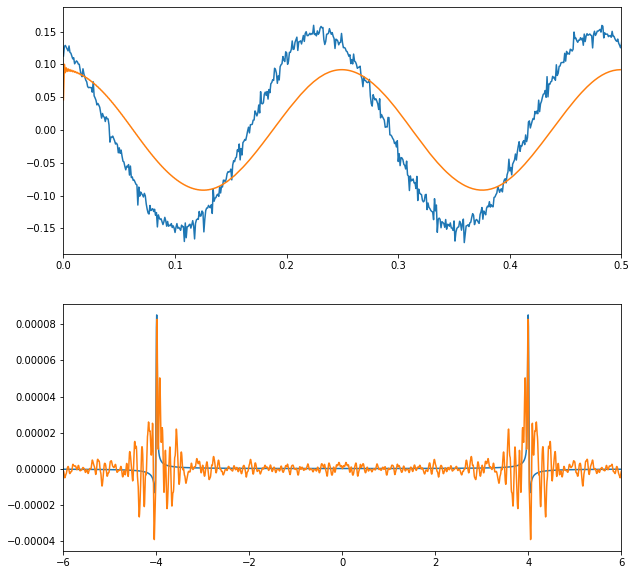

In [152]:
_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.plot(ti, time_domain.gauss_window(V, freq_in, ti, b))
ax1.plot(ti, V_adj)
# ax1.plot(ti, time_domain.gauss_window(V, freq_in, ti, b))
# ax1.plot(ti, V_adj)
ax1.set_xlim(0, .5)

ax2.plot(frequencies, Ir_adj_fit.eval().real)
ax2.plot(frequencies, time_domain.get_windowed_fft(ti, Ir, freq_in, b).real)
# ax2.plot(frequencies, Ir_adj_fit.eval().imag)
# ax2.plot(frequencies, time_domain.get_windowed_fft(ti, Ir, freq_in, b).imag)
# ax2.plot(freq_list, V_adj_fit.eval().real)
# ax2.plot(freq_list, V_adj_fit.data.real)
ax2.set_xlim(-6, 6)

plt.show()

c:\users\shadd\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\shadd\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


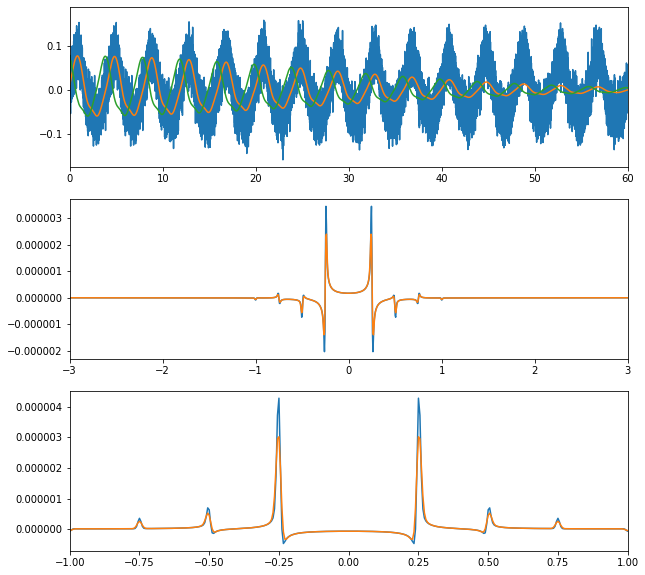

In [141]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,10))
ax1.plot(ti, J*400)
ax1.plot(ti, J_adj*400)
ax1.plot(ti, J_adj2*400)
ax1.set_xlim(0, 60)

freq_list = J_adj_fit2.userkws['frequencies']
ax2.plot(freq_list, J_adj_fit.eval().real)
ax2.plot(freq_list, J_adj_fit.data.real)
ax2.set_xlim(-3, 3)

ax3.plot(freq_list, J_adj_fit2.eval().real)
ax3.plot(freq_list, J_adj_fit2.data.real)
ax3.set_xlim(-1, 1)
# ax2.set_ylim(-1e-6,1e-6)
plt.show()

In [44]:
J_adj_fit.data - J_adj_fit2.data

array([2.97858081e-09+2.11052041e-09j, 6.84697198e-09+4.05240713e-09j,
       1.08302991e-08+2.09201658e-09j, ...,
       1.08302991e-08-2.09201658e-09j, 6.84697198e-09-4.05240713e-09j,
       2.97858081e-09-2.11052041e-09j])

In [46]:
time_domain.get_windowed_fft()

In [76]:
aa = 'str'
bb= 15
cc =1.5

isinstance(bb, str)

False